<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Exam_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, classification_report
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
!pip install --user --upgrade scikit-learn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bmw.csv to bmw (1).csv


In [ ]:
bmw = pd.read_csv('bmw.csv')

In [ ]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [ ]:
bmw.model.value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 Z4           108
 6 Series     108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

In [ ]:
bmw.transmission.value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [ ]:
bmw.fuelType.value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [ ]:
bmw.shape

(10781, 9)

In [ ]:
bmw.engineSize.value_counts()

2.0    6575
3.0    2458
1.5    1463
1.6     109
4.4      79
0.0      47
2.5      14
0.6       7
4.0       6
2.2       6
3.2       5
1.9       5
6.6       2
2.8       2
1.0       1
5.0       1
3.5       1
Name: engineSize, dtype: int64

In [ ]:
def bmw_model_series(model):
    if model.strip()[0] == 'X':
        return 'X Series'
    elif model.strip()[0] == 'M':
        return 'M Series'
    elif model.strip()[0] == 'Z':
        return 'Z Series'
    elif model.strip()[0] == 'i':
        return 'i Series'
    else:
        return model
    
bmw['model_series'] = bmw['model'].apply(bmw_model_series)

In [ ]:
bmw['fuelType_short'] = bmw['fuelType'].apply(lambda x: 'Others' if x not in ['Diesel','Petrol'] else x)
bmw['engineSize_short'] = bmw['engineSize'].apply(lambda x: 4 if x not in [2,3,1.5] else x)

In [ ]:
bmw.engineSize_short.value_counts()

2.0    6575
3.0    2458
1.5    1463
4.0     285
Name: engineSize_short, dtype: int64

In [ ]:
bmw.fuelType_short.value_counts()

Diesel    7027
Petrol    3417
Others     337
Name: fuelType_short, dtype: int64

In [ ]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_series,fuelType_short,engineSize_short
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,5 Series,Diesel,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,6 Series,Petrol,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,5 Series,Diesel,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,1 Series,Diesel,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,7 Series,Diesel,3.0


In [ ]:
bmw.drop(['model', 'fuelType', 'engineSize'],axis=1,inplace=True)

In [ ]:
bmw_short = bmw.copy()

In [ ]:
bmw_short.head()

,year,price,transmission,mileage,tax,mpg,model_series,fuelType_short,engineSize_short
0,2014,11200,Automatic,67068,125,57.6,5 Series,Diesel,2
1,2018,27000,Automatic,14827,145,42.8,6 Series,Petrol,2
2,2016,16000,Automatic,62794,160,51.4,5 Series,Diesel,3
3,2017,12750,Automatic,26676,145,72.4,1 Series,Diesel,1.5
4,2014,14500,Automatic,39554,160,50.4,7 Series,Diesel,3


<Figure size 720x2160 with 0 Axes>

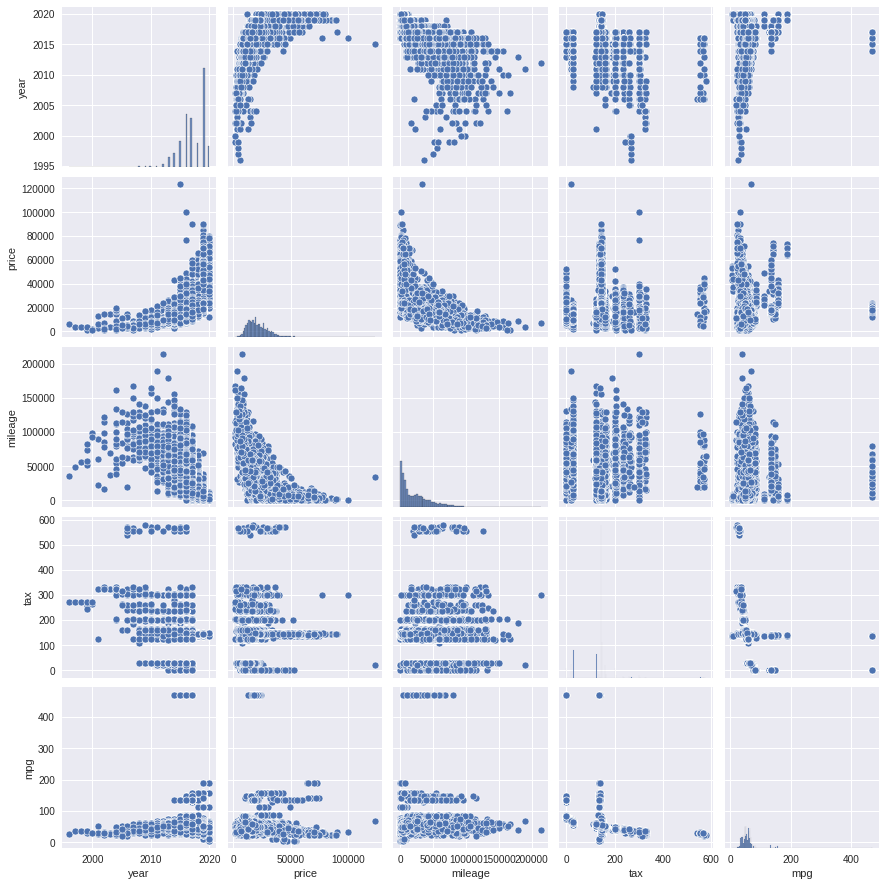

In [ ]:
plt.figure(figsize=(10,30))
sns.pairplot(bmw_short)

In [ ]:
#create function for distribution plot
def dist_plot(df, var, bin) :
    plt.style.use('seaborn')
    fig, (ax1,ax2) = plt.subplots(2,figsize=(8,6), sharex=True)
    fig.suptitle(var +' Distribution', size=15,fontweight='bold')

    #calculate mean, median, mode
    mean = df[var].mean()
    med = df[var].median()
    mode = df[var].mode()[0]

    #create boxplot
    sns.boxplot(x=df[var], ax=ax1)
    ax1.set_xlabel('')

    #create histogram
    sns.histplot(x=df[var], bins=bin, kde=True, ax=ax2)   
    ax2.set_xlabel(var)
    ax2.set_ylabel('Frequency')
     #add vertical line histogram
    ax2.axvline(mean, color = 'b', linestyle='dashed',label='Mean :'+str(round(mean,2)))
    ax2.axvline(med, color = 'k', linestyle='dashdot',label='Median :'+str(round(med,2)))
    ax2.axvline(mode, color = 'c', linestyle='dotted',label='Mode :'+str(round(mode,2)))
    ax2.legend(loc='upper right')
    
    plt.show()

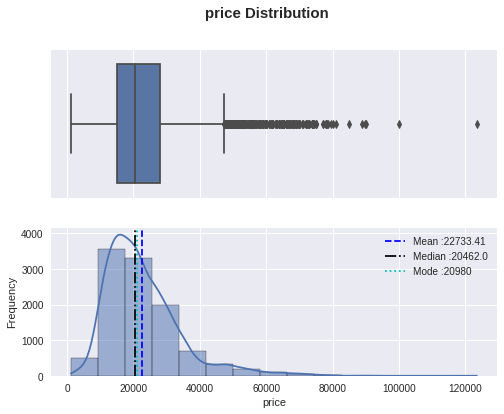

In [ ]:
dist_plot(bmw, 'price', 15)

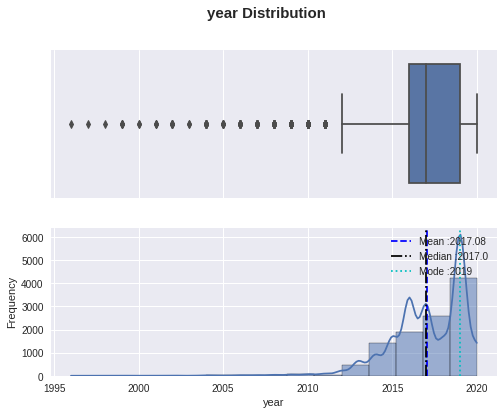

In [ ]:
dist_plot(bmw, 'year', 15)

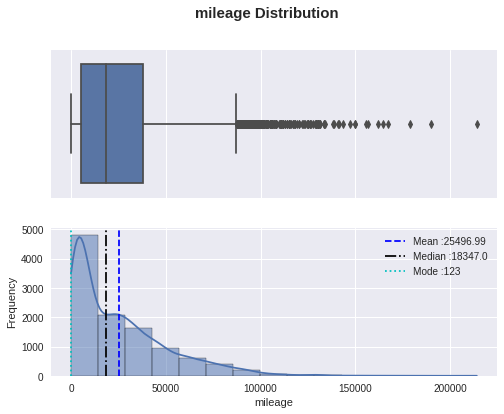

In [ ]:
dist_plot(bmw, 'mileage', 15)

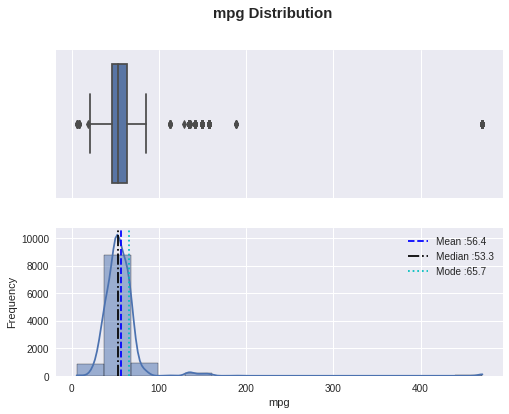

In [ ]:
dist_plot(bmw, 'mpg', 15)

# Preprocess

In [ ]:
bmw_short.head()

,year,price,transmission,mileage,tax,mpg,model_series,fuelType_short,engineSize_short
0,2014,11200,Automatic,67068,125,57.6,5 Series,Diesel,2
1,2018,27000,Automatic,14827,145,42.8,6 Series,Petrol,2
2,2016,16000,Automatic,62794,160,51.4,5 Series,Diesel,3
3,2017,12750,Automatic,26676,145,72.4,1 Series,Diesel,1.5
4,2014,14500,Automatic,39554,160,50.4,7 Series,Diesel,3


In [ ]:
bmw_short = bmw[['year','price','transmission','mileage','fuelType_short']].copy()

In [ ]:
scaled_features = ['price','mileage']
ordinal_features = ['year']
onehot_features = ['transmission', 'fuelType_short']

col_transformer = make_column_transformer(
                        (MinMaxScaler(),scaled_features),
                        (OrdinalEncoder(),ordinal_features),
                        (OneHotEncoder(sparse=False, drop='first'),onehot_features)
                        )

In [ ]:
bmw_preprocessed = col_transformer.fit_transform(bmw_short)

In [ ]:
bmw_preprocessed = pd.DataFrame(bmw_preprocessed)

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [ ]:
bmw_preprocessed.columns = get_feature_names(col_transformer)

In [ ]:
bmw_preprocessed.head()

,minmaxscaler__price,minmaxscaler__mileage,ordinalencoder__year,onehotencoder__x0_Manual,onehotencoder__x0_Semi-Auto,onehotencoder__x1_Others,onehotencoder__x1_Petrol
0,0.081796,0.313399,18.0,0.0,0.0,0.0,0.0
1,0.211033,0.069281,22.0,0.0,0.0,0.0,1.0
2,0.121057,0.293427,20.0,0.0,0.0,0.0,0.0
3,0.094474,0.124650,21.0,0.0,0.0,0.0,0.0
4,0.108788,0.184828,18.0,0.0,0.0,0.0,0.0


In [ ]:
#Getting k by silhoutte score
sil_score = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k, random_state=2021)
  kmeans.fit(bmw_preprocessed)
  sil_score.append(silhouette_score(bmw_preprocessed, kmeans.labels_, metric='euclidean'))

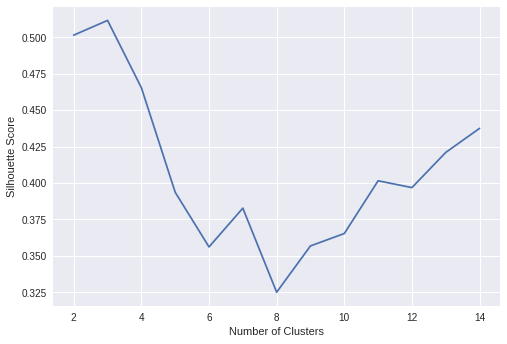

In [ ]:
#Plotting silhoutte score
sns.lineplot(x=range(2,15), y=sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(bmw_preprocessed)

KMeans(n_clusters=3, random_state=2021)

In [ ]:
silhouette_score(bmw_preprocessed, kmeans.labels_, metric='euclidean')

0.5114582812649161

In [ ]:
pca = PCA()
bmw_pca = pca.fit_transform(bmw_preprocessed)

In [ ]:
var = pca.explained_variance_ratio_
cum_var=np.cumsum(np.round(var, decimals=3)*100)

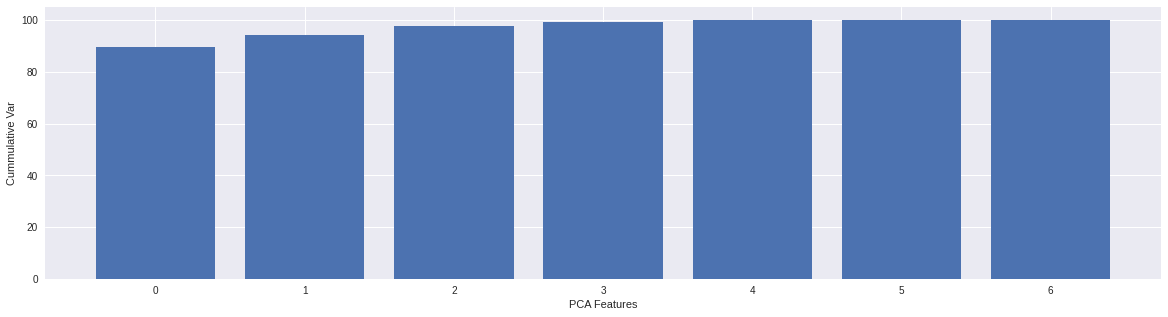

In [ ]:
plt.figure(figsize=(20,5))
features = range(pca.n_components_)
plt.bar(features, cum_var)
plt.xlabel('PCA Features')
plt.xticks(features)
plt.ylabel('Cummulative Var')
plt.show()

In [ ]:
pca2 = PCA(n_components=2)
bmw_pca = pca2.fit_transform(bmw_preprocessed)

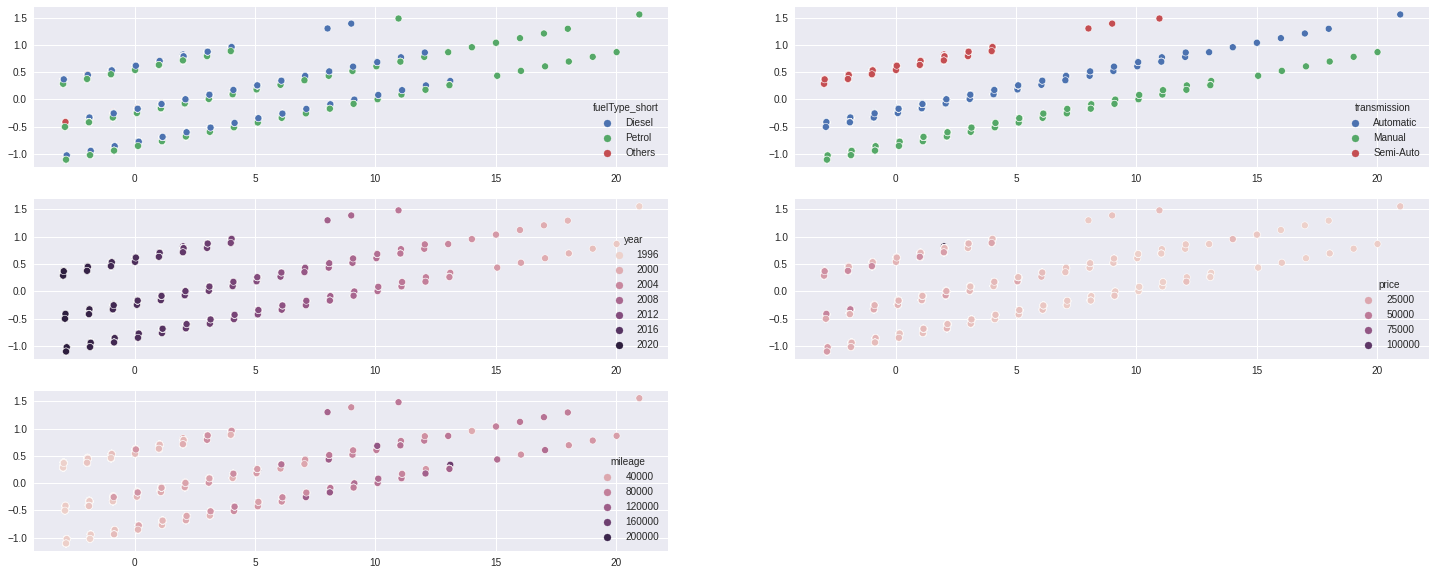

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(25,10))
ax[2][1].remove()
sns.scatterplot(x=bmw_pca[:, 0], y=bmw_pca[:, 1], hue=bmw['fuelType_short'], ax=ax.flatten()[0])
sns.scatterplot(x=bmw_pca[:, 0], y=bmw_pca[:, 1], hue=bmw['transmission'], ax=ax.flatten()[1])
sns.scatterplot(x=bmw_pca[:, 0], y=bmw_pca[:, 1], hue=bmw['year'], ax=ax.flatten()[2])
sns.scatterplot(x=bmw_pca[:, 0], y=bmw_pca[:, 1], hue=bmw['price'], ax=ax.flatten()[3])
sns.scatterplot(x=bmw_pca[:, 0], y=bmw_pca[:, 1], hue=bmw['mileage'], ax=ax.flatten()[4])
plt.show()

In [ ]:
y = bmw['price'].copy()
X = bmw.drop('price', axis=1).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [ ]:
scaled_features = ['mileage','tax','mpg']
ordinal_features = ['year','engineSize_short']
onehot_features = ['transmission', 'fuelType_short']

col_transformer = make_column_transformer(
                        (MinMaxScaler(),scaled_features),
                        (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),ordinal_features),
                        (OneHotEncoder(handle_unknown='ignore',sparse=False),onehot_features)
                        )

In [ ]:
prep_pipeline = make_pipeline(col_transformer, PolynomialFeatures(degree=2))

In [ ]:
X_train_preprocessed = pd.DataFrame(prep_pipeline.fit_transform(X_train))

In [ ]:
model_params = {
    'svm' : {
        'model': SVR(),
        'params' : {
            'C' : [1,10]
        }
    },
    'random_forest' : {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'ridge' : {
        'model' : Ridge(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1]
        }
    }
}

In [ ]:
scores = []
for model_name, mp in model_params.items():
  grid = GridSearchCV(estimator=mp['model'],param_grid=mp['params'],cv=5, scoring='r2')
  grid.fit(X_train_preprocessed, y_train)

  scores.append({
      'model': model_name,
      'best_score': grid.best_score_,
      'best_params' : grid.best_params_
  })

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(scores)

In [ ]:
X_test_preprocessed = pd.DataFrame(prep_pipeline.transform(X_test))

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_preprocessed,y_train)
y_pred = rf.predict(X_test_preprocessed)

In [ ]:
print(r2_score(y_test, y_pred))

0.8881636136732242


Using PCA

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_preprocessed)

In [ ]:
var = pca.explained_variance_ratio_
cum_var=np.cumsum(np.round(var, decimals=3)*100)

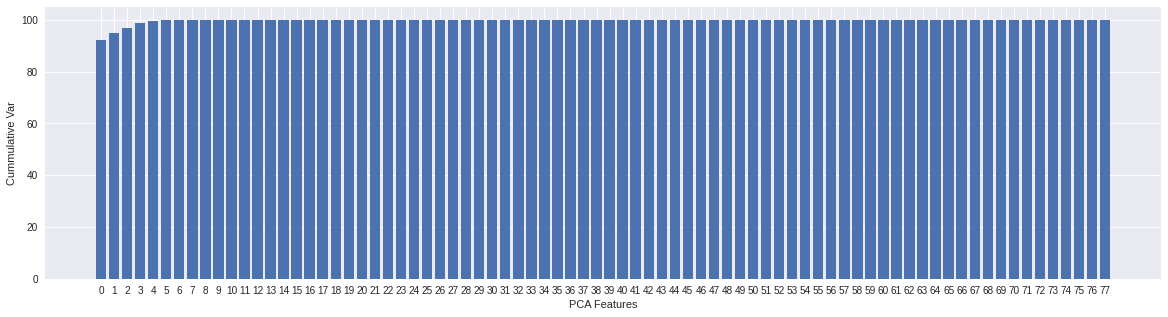

In [ ]:
plt.figure(figsize=(20,5))
features = range(pca.n_components_)
plt.bar(features, cum_var)
plt.xlabel('PCA Features')
plt.xticks(features)
plt.ylabel('Cummulative Var')
plt.show()

In [ ]:
pca2 = PCA()
X_train_pca = pca2.fit_transform(X_train_preprocessed)

In [ ]:
pca2 = PCA()
X_test_pca = pca2.fit_transform(X_test_preprocessed)

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_pca,y_train)
y_pred = rf.predict(X_test_pca)

In [ ]:
print(r2_score(y_test, y_pred))

0.38343649711998073
